In [1]:
%matplotlib inline
%config InlineBackend.figure_format = True
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
from astropy.utils.console import ProgressBar
import caos 

from caos import Star, Spot

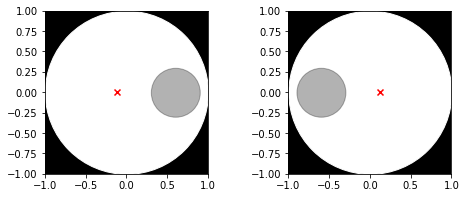

In [2]:
gj1243_t0 = Star()
gj1243_t0.spots = [Spot(x=0.6, y=0.00, r=0.30)]

gj1243_t1 = Star()
gj1243_t1.spots = [Spot(x=-0.6, y=0.00, r=0.30)]

fig, ax = plt.subplots(1, 2, figsize=(8, 3))
gj1243_t0.plot(col=True, ax=ax[0])
gj1243_t1.plot(col=True, ax=ax[1])

In [3]:
max_photocenter_shift = 2*abs(gj1243_t0.center_of_light[0])

max_photocenter_shift

0.23750440461138841

/Users/bmmorris/git/caos/caos/catalog.py:57: RuntimeWarning: invalid value encountered in log10
  M_V = Vmag - 5*(np.log10(dist_pc) + 1)


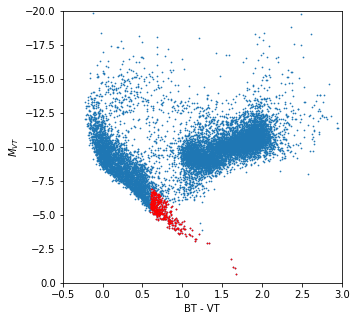

In [9]:
from caos import get_table_ms, sigma_fov, N_fov
from astropy.constants import R_sun
import astropy.units as u

fig, ax = plt.subplots(figsize=(5, 5))
table, ms = get_table_ms(ax=ax)
fig.savefig('plots/hr.pdf', bbox_inches='tight')

In [13]:
def teff_to_radius(t_eff): 
    """Boyajian 2012"""
    X = t_eff 
    return (-8.133 + 5.09342e-3 * X - 9.86602e-7 * X**2 + 6.47963e-11 * X**3) * R_sun

gj1243_teff = 3200 # estimate for sptype = M4
R_star = teff_to_radius(gj1243_teff)

# Compute the apparent angular jitter due to sunspots at the
# distances of nearby MS stars in the TGAS sample
distances = table['distance'][ms]
jitter_rstar = max_photocenter_shift * R_star
jitter_amplitude = np.arctan((jitter_rstar/distances).decompose()).to(u.uarcsec)

# Estimate the single-measurement astrometric error for each star
# in the TGAS sample: 
astrometric_uncertainty = table['sigma_fov'][ms]/np.sqrt(table['N_fov'][ms])

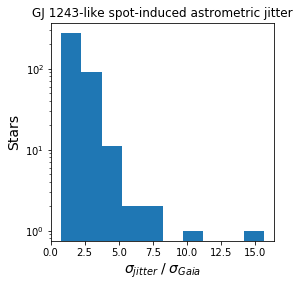

In [22]:
plt.figure(figsize=(4, 4))

plt.hist(jitter_amplitude/astrometric_uncertainty, log=True)
plt.title('GJ 1243-like spot-induced astrometric jitter')
plt.ylabel('Stars', fontsize=14)
plt.xlabel('$\sigma_{jitter} \; / \; \sigma_{Gaia}$', fontsize=14)
plt.savefig('plots/gj1243_jitter.pdf', bbox_inches='tight')

In [7]:
np.argsort(table['<Gmag>'].data.data)[1]

9400

In [30]:
print(">3sig = {}, >5sig = {}".format(np.count_nonzero(jitter_amplitude/astrometric_uncertainty > 3), 
                                      np.count_nonzero(jitter_amplitude/astrometric_uncertainty > 5)))

>3sig = 37, >5sig = 6


### Activity cycle